# Determine Insurance Premiums

This notebook aims to predict the value of insurance premiums based on customer informations.

When you finish this notebook, you'll have a foundational knowledge on Predictive Analysis

### Problem Statement

- Given a set amount of features, treat them to extract the best possible model to predict the final value of the insurance premium

- The dataset was extracted from kaggle https://www.kaggle.com/competitions/playground-series-s4e12/data
    - This dataset was generated from a similar dataset https://www.kaggle.com/datasets/schran/insurance-premium-prediction
    - They are just similar and can be used in conjunction, but they are not the same

### Evaluation

- Submissions are evaluated using the Root Mean Squared Logarithmic Error (RMSLE) 
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_log_error.html#sklearn.metrics.root_mean_squared_log_error

    - Advantages of using RMLSE:
        - https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a
        - Robustness to the effect of outliers
        - The internal part of the RMSLE is fundamentally a calculation of relative error between the predicted and the actual values
        - Biased penalty - RMSLE incurs a larger penalty for the underestimation of the Actual variable than the Overestimation. More penalty is incurred when the predicted Value is less than the Actual Value
            - Especially useful for business cases where the underestimation of the target variable is no acceptable but overestimation can be tolerated
                
                **In this case, RMLSE is very useful since the Insurance Premium is the value paid to maintain coverage**
                
                **If we underestimate the premium to be paid, the insurance company will be loosing money. But we won't have much problem if the premium is slightly overestimated**

### Submission file

For each id row in the test set, you must predict the continuous target Premium Amount. The file should contain a header and have the following format:

id,Premium Amount

1200000,1102.545

1200001,1102.545

1200002,1102.545

etc.

#### Data loading

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns

In [134]:
#Import train set
df_path = 'depression_train.csv'
df = pd.read_csv(df_path,index_col="id")

df.head()

#Import test set
df_test_path = 'depression_test.csv'
df_test = pd.read_csv(df_test_path,index_col="id")

X_test = df_test.copy()

In [135]:
#Separate target from train set
#X_train.dropna(axis=0,subset=['Depression'],inplace=True)
#y_train = X_train.pop('Depression')

In [136]:
#Mark train column as 'True' for train set and 'False' for test set
#So I can join both sets and make necessary transformations on both sets at the same time
df['is_train'] = 1
X_test['is_train'] = 0

df_total = pd.concat([df, X_test])

In [137]:
df_total.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,is_train
id,,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0,1
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0,1


In [138]:
df_total.tail()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,is_train
id,,,,,,,,,,,,,,,,,,,,
234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,NaN,0
234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,NaN,0
234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,NaN,0
234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,NaN,0
234499,Gauri,Female,43.0,Varanasi,Working Professional,Educational Consultant,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,B.Ed,No,11.0,2.0,No,NaN,0


### Data understanding

In [139]:
df_total.dtypes

Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                               float64
is_train                                   int64
dtype: object

In [140]:
feature_check = df_total['Dietary Habits']

In [141]:
#Show unique values
print(feature_check.unique())

['Healthy' 'Unhealthy' 'Moderate' 'Yes' 'Pratham' 'BSc' 'Gender' '3'
 'More Healthy' 'Less than Healthy' 'Mihir' '1.0' 'Hormonal' 'Electrician'
 nan 'No Healthy' 'Less Healthy' 'M.Tech' 'Vegas' 'No' 'Male' 'Indoor'
 'Class 12' '2' 'Prachi' 'Mealy' 'Resistant' 'MCA' '5 Healthy' 'Academic'
 'Educational' 'Soham' '5 Unhealthy' 'Vivaan' 'Raghav' 'Naina' 'Kolkata']


In [142]:
#Count unique values
print(feature_check.nunique())

36


In [143]:
#Count the occurance of each unique value in the column - check crazy values
print(feature_check.value_counts())

Dietary Habits
Moderate             82723
Unhealthy            77013
Healthy              74707
No                       8
More Healthy             4
Indoor                   2
Male                     2
Yes                      2
1.0                      2
Less Healthy             2
Academic                 1
Resistant                1
MCA                      1
5 Healthy                1
Educational              1
Prachi                   1
Soham                    1
5 Unhealthy              1
Vivaan                   1
Raghav                   1
Naina                    1
Mealy                    1
Pratham                  1
2                        1
Class 12                 1
BSc                      1
Vegas                    1
M.Tech                   1
No Healthy               1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
Kolkata                  1
Name: count, 

In [144]:
#Number of missing values in each column of data
missing_val_count_by_column = (df_total.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Profession             61262
Academic Pressure     187836
Work Pressure          46696
CGPA                  187836
Study Satisfaction    187836
Job Satisfaction       46684
Dietary Habits             9
Degree                     4
Financial Stress           4
Depression             93800
dtype: int64


**Features - First notes**

- Name: Name of the insured individual (Categorical)
- Gender: Gender of the insured individual (Categorical: Male, Female)
- Age: Age of the insured individual (Numerical)
- City: City of the insured individual (Categorical: 124 unique values)
- Working Professional or Student (Categorical: Working Professional, Student)
- Profession: Profession of the insured individual (Categorical: 81 unique values **missing values**)
- Academic Pressure: Leve of academic pressure (Numerical: 1-5 **missing values**) - *Missing values are for "Working Professionals"?* 
- Work Pressure: Level of work pressure (Numerical: 1-5 **missing values**) - *Missing values are for "Studentes"?*
    - Academic Pressure and Work Pressure might be combined into Feature **Pressure**
- CGPA: Cumulative Grade Point Average - Student related (Numerical: 0-10) **Missing for working professionals**
- Study Satisfaction: Level of study satisfaction (Numerical: 1-5) **Missing values** 
- Job Satisfaction: Level of working satisfaction (Numerical: 1-5) **Missing values**
    - Study satisfaction and Job satisfaction might be combined into Feature **Satisfaction**
- Sleep duration: Range of sleep duration (Categorical: *doesn't seem useful*) - **Check on crazy values**
- Dietary Habits: Category of heathiness (Categorical: Healthy, Unhealthy, Moderate) - **Check on crazy values**
- Degree: Type of degree (Categorical: 156 unique values - *Hardly useful*)
- Have you ever had suicidal thoughts ?: Yes/No question (Categorical: Yes/No)
- Financial Stress: Level of financial stress (Numerical 1-5) **Missing Values**
- Family History of Mental Illness: Yes/No question (Categorical: Yes/No)

### Data cleaning

- Profession
- CGPA
- Sleep Duration
- Dietary Habits
- Financial Stress

(Ps: Pressure and Satisfaction will be treated on *Feature Engineering*)

- Profession
- City

Profession is not a complicated case. There are missing values for "Student", which is natural and some missing values for "Working Professional", which we could classify as "Unknown" or any other choice. However, first glance showed 81 unique values. That doesn't seem useful at first. So, the code for filling the missing data is bellow just for knowledge. We are actually dropping this column.

For City, the approach will be the same, the filling code would be similar to the Profession case.

In [145]:
#Understanding the data

#df_total[['Working Professional or Student','Profession']].head(20)

# Filter rows where column 'Profession' has NaN values
#filtered_df = df_total[df_total['Profession'].isna()]


# Count unique values in column 'A' for these rows
#unique_count = filtered_df['Working Professional or Student'].unique()
#print(unique_count)

In [146]:
# Fill column 'Profession' based on values for 'Working Professional or Student'
#df_total['Profession'] = np.where(df_total['Profession'].isna() & (df_total['Working Professional or Student'] == 'Working Professional'), 'Unknown', df_total['Profession'])
#df_total['Profession'] = np.where(df_total['Profession'].isna() & (df_total['Working Professional or Student'] == 'Student'), 'Student', df_total['Profession'])

In [147]:
df_total.drop(axis=1, labels= ['Profession','City','Degree'],inplace=True)

In [148]:
#Count the occurance of each unique value in the column - check crazy values
print(df_total['Dietary Habits'].value_counts())

Dietary Habits
Moderate             82723
Unhealthy            77013
Healthy              74707
No                       8
More Healthy             4
Indoor                   2
Male                     2
Yes                      2
1.0                      2
Less Healthy             2
Academic                 1
Resistant                1
MCA                      1
5 Healthy                1
Educational              1
Prachi                   1
Soham                    1
5 Unhealthy              1
Vivaan                   1
Raghav                   1
Naina                    1
Mealy                    1
Pratham                  1
2                        1
Class 12                 1
BSc                      1
Vegas                    1
M.Tech                   1
No Healthy               1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
Kolkata                  1
Name: count, 

In [149]:
#Count the occurance of each unique value in the column - check crazy values
print(df_total['Sleep Duration'].value_counts())

Sleep Duration
Less than 5 hours                      64445
7-8 hours                              61460
More than 8 hours                      54916
5-6 hours                              53546
6-7 hours                                 15
3-4 hours                                 15
4-5 hours                                 13
2-3 hours                                  9
8-9 hours                                  8
4-6 hours                                  7
1-6 hours                                  6
No                                         4
6-8 hours                                  4
9-5                                        3
9-11 hours                                 3
1-2 hours                                  3
Unhealthy                                  3
9-5 hours                                  3
Sleep_Duration                             2
Meerut                                     2
3-6 hours                                  2
than 5 hours                            

- Sleep Duration
- Dietary Habit

These are interesting cases. They have a huge amount of categories, but the majority of cases are concetrated on 3 or 4 categories. So we will check the amount of data outside of the most common categories.

In [150]:
count = len(df_total[(df_total['Dietary Habits'] == 'Healthy') | (df_total['Dietary Habits'] == 'Unhealthy') | (df_total['Dietary Habits'] == 'Moderate')])/len(df_total['Dietary Habits'])
print(count)

0.9997569296375266


In [151]:
count = len(df_total[(df_total['Sleep Duration'] == 'Less than 5 hours') | (df_total['Sleep Duration'] == '7-8 hours') | (df_total['Sleep Duration'] == 'More than 8 hours') | (df_total['Sleep Duration'] == '5-6 hours')])/len(df_total['Sleep Duration'])
print(count)

0.9994328358208955


In [152]:
df_total = df_total.drop(df_total[(df_total['Dietary Habits'] != 'Healthy') & (df_total['Dietary Habits'] != 'Unhealthy') & (df_total['Dietary Habits'] != 'Moderate')].index)

df_total = df_total.drop(df_total[(df_total['Sleep Duration'] != 'Less than 5 hours') & (df_total['Sleep Duration'] != '7-8 hours') & (df_total['Sleep Duration'] != 'More than 8 hours') & (df_total['Sleep Duration'] != '5-6 hours')].index)

# Resetting the index
df_total.reset_index(inplace=True)

The most common values on those two columns represents more than 99% of the data. We could take a look on the crazy data and try treating it. But We'll just let it go and not pay much attention to it as it seems too much work for little gain.

In [153]:
#Count the occurance of each unique value in the column - check crazy values
print(df_total['Sleep Duration'].value_counts())

Sleep Duration
Less than 5 hours    64429
7-8 hours            61441
More than 8 hours    54905
5-6 hours            53535
Name: count, dtype: int64


- CGPA

This is a 'Student' feature, so 'Working Professionals' won't have an assigned value to it. Two approaches come to mind:

    1. Simply delete this feature and get on with it (probably a good start)
    2. Check on the existing distribution, maybe adjust it to a normal distribution and assign the average value to the missing rows. 

For learning purposes, lets go with the second option. We can run the final model on a data set with option 1 and compare results later.

In [154]:
from scipy import stats

(array([1217.,  733., 1184., 2075., 2599., 1636., 1296., 1037., 1420.,
         397., 1529., 1070., 2282., 1484., 1472.,  983., 1426., 1682.,
        2678., 1002., 1173., 1856., 1627., 2264., 1050., 1396., 1955.,
        1139., 1593., 3360.]),
 array([ 5.03      ,  5.19566667,  5.36133333,  5.527     ,  5.69266667,
         5.85833333,  6.024     ,  6.18966667,  6.35533333,  6.521     ,
         6.68666667,  6.85233333,  7.018     ,  7.18366667,  7.34933333,
         7.515     ,  7.68066667,  7.84633333,  8.012     ,  8.17766667,
         8.34333333,  8.509     ,  8.67466667,  8.84033333,  9.006     ,
         9.17166667,  9.33733333,  9.503     ,  9.66866667,  9.83433333,
        10.        ]),
 <BarContainer object of 30 artists>)

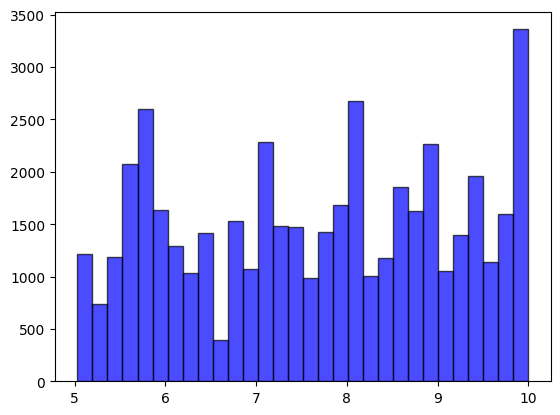

In [155]:
plt.hist(df_total['CGPA'], bins=30, color='blue', alpha=0.7, edgecolor='black')

In [156]:
df_total['CGPA'].describe()

count    46615.000000
mean         7.664792
std          1.464678
min          5.030000
25%          6.290000
50%          7.770000
75%          8.930000
max         10.000000
Name: CGPA, dtype: float64

The CGPA data is nothing like a normal distribution, so the approach number 2 doesn't make much sense. So we are just dropping this column.

In [157]:
df_total.drop(axis=1, labels= ['CGPA'],inplace=True)

- Financial Stress

As financial stress may be impacted by the "Working Professional or Student" status, the missing value will be filled as the previous cases, the average of values for the group where each missing value case is found.

In [158]:
mean_financial = df_total.groupby('Working Professional or Student').mean(numeric_only=True)

df_total['Financial Stress'] = df_total['Financial Stress'].fillna(df_total['Working Professional or Student'].map(mean_financial['Financial Stress']).where(df['Working Professional or Student'] == 'Student', df_total['Working Professional or Student'].map(mean_pressure['Financial Stress'])))

# Feature Engineering

This is the study of the features aiming on optimizing the use of features. The final goal is dimension reduction. That is having less features. This can be acchieved:
    
        - Joining two features (like salary and dividends, can be combined into 'income')
        - Deleting one feature (if two features are strongly correlated, only one is necessary in the data set)

There are other ways to tap into it, but as a brief introduction, this should sufice.

- Academic pressure
- Work pressure

- Study satisfaction
- Work satisfaction

These will be combined in two new features "Pressure" and "Satisfaction". However it was noted that there are missing values. As these are all numerical, we can fill in blanks with the average values. As the average might defer from Students to Working Professionals, this task will be performed with the average by group.

In [159]:
#First we will create the new columns

# Criar a nova coluna 'Pressure' com base nas condições
df_total['Pressure'] = np.where(df_total['Working Professional or Student'] == 'Student', df_total['Academic Pressure'], df_total['Work Pressure'])

df_total['Satisfaction'] = np.where(df_total['Working Professional or Student'] == 'Student', df_total['Study Satisfaction'], df_total['Job Satisfaction'])


In [160]:
mean_pressure = df_total.groupby('Working Professional or Student').mean(numeric_only=True)

df_total['Pressure'] = df_total['Pressure'].fillna(df_total['Working Professional or Student'].map(mean_pressure['Academic Pressure']).where(df['Working Professional or Student'] == 'Student', df_total['Working Professional or Student'].map(mean_pressure['Work Pressure'])))

mean_satisfaction = df_total.groupby('Working Professional or Student').mean(numeric_only=True)

df_total['Satisfaction'] = df_total['Satisfaction'].fillna(df_total['Working Professional or Student'].map(mean_satisfaction['Study Satisfaction']).where(df['Working Professional or Student'] == 'Student', df_total['Working Professional or Student'].map(mean_pressure['Job Satisfaction'])))

In [161]:
df_total.drop(axis=1, labels= ['Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction'],inplace=True)

In [162]:
#Number of missing values in each column of data
missing_val_count_by_column = (df_total.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Depression    93716
dtype: int64
